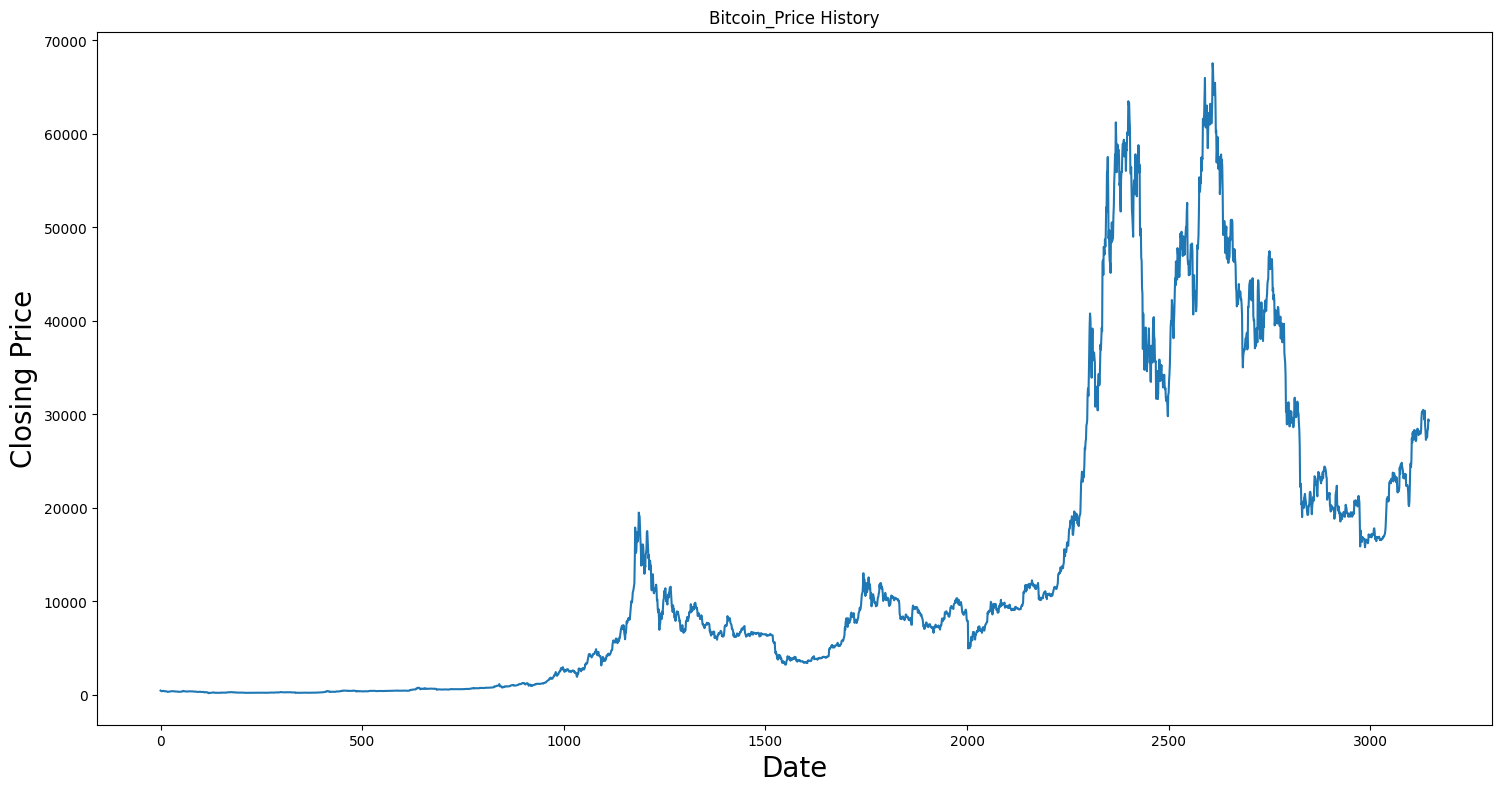

Epoch 1/50
77/77 [==============================] - 15s 108ms/step - loss: 0.0048
Epoch 2/50
77/77 [==============================] - 7s 93ms/step - loss: 0.0016
Epoch 3/50
77/77 [==============================] - 8s 109ms/step - loss: 0.0015
Epoch 4/50
77/77 [==============================] - 8s 100ms/step - loss: 0.0013
Epoch 5/50
77/77 [==============================] - 8s 102ms/step - loss: 0.0012
Epoch 6/50
77/77 [==============================] - 8s 109ms/step - loss: 0.0011
Epoch 7/50
77/77 [==============================] - 7s 96ms/step - loss: 9.4878e-04
Epoch 8/50
77/77 [==============================] - 8s 107ms/step - loss: 0.0010
Epoch 9/50
77/77 [==============================] - 8s 109ms/step - loss: 0.0010
Epoch 10/50
77/77 [==============================] - 7s 93ms/step - loss: 0.0011
Epoch 11/50
77/77 [==============================] - 8s 109ms/step - loss: 9.6421e-04
Epoch 12/50
77/77 [==============================] - 7s 97ms/step - loss: 0.0011
Epoch 13/50
77/77 [=

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

# Loading the data
df = pd.read_csv('BTC-USD.csv')

# Visualize the data
#Syntax taken from https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size
plt.figure(figsize=(18,9))      
plt.title('Bitcoin_Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.show()

# Prepare the data for the LSTM model
dataset = df.filter(['Close'])  
final_data = dataset.values
training_dataset_len = int(np.ceil( len(final_data) * 0.8 ))

scaler = MinMaxScaler(feature_range=(0, 1)) # Syntax taken from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html and HTTP://www.stackoverflow.com
scaled_dataset = scaler.fit_transform(final_data)

train_dataset = scaled_dataset[0:training_dataset_len, :]

x_train = []
y_train = []
for i in range(60, len(train_dataset)):
    x_train.append(train_dataset[i-60:i, 0])
    y_train.append(train_dataset[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

# Build the LSTM model    #Syntax taken from https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/ 
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model 
#Syntax taken from https://stackoverflow.com/questions/66016931/model-fitx-train-y-train-epochs-5-validation-data-x-test-y-test-isnt-wor
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Test the model  #Syntax taken from https://www.stackoverflow.com 
test_dataset = scaled_dataset[training_dataset_len - 60: , :]
x_test = []
y_test = final_data[training_dataset_len:, :]
for i in range(60, len(test_dataset)):
    x_test.append(test_dataset[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

# Visualize the results
plt.figure(figsize=(16,8))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price', fontsize=18)
plt.legend()
plt.show()

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.9829816948644793


In [ ]:
#lag 1 autocorrelation

lag_1_autocorr = df['Close'].autocorr(lag=1)
print('Lag 1 autocorr is: ', lag_1_autocorr)

Lag 1 autocorr is:  0.9987859838282792


In [ ]:
# Prepare the dataset for forecasting
last_60_days = dataset[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

# Reshape the dataset
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict the future prices
predicted_price_for_next_day = model.predict(x_test)

# Inverse transform the dataset
predicted_price_for_next_day = scaler.inverse_transform(predicted_price_for_next_day)

print("The predicted price for the next day is:", predicted_price_for_next_day[0][0])

1/1 [==============================] - 0s 33ms/step
The predicted price for the next day is: 29069.094


In [ ]:
# Simulator Trader

todayPrice = df["Close"].iloc[-1]

if predicted_price_for_next_day > todayPrice:
    print('Buy')
elif predicted_price_for_next_day < todayPrice:
    print('Sell')
else:
    print('Do Nothing')

Sell


In [ ]:
df["Close"].iloc[-1]

29340.26172

In [ ]:
#Lag 1 autocorrelation for the last two years' dataset

# Filter the last two years of dataset
last_two_years = df['Close'][-730:]
# print(last_two_years)

# Calculate the lag 1 autocorrelation
lag_1_autocorr = last_two_years.autocorr(lag=1)

print('The lag 1 autocorrelation for the last two years is:', lag_1_autocorr)

The lag 1 autocorrelation for the last two years is: 0.9950497509445109
